# Import Library

In [52]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer

# Import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #turn off warning
import pickle

from sklearn.metrics import silhouette_score,silhouette_samples



# Load Data

In [53]:
df = pd.read_csv('credit_customers.csv')
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [54]:
df['class'] = df['class'].replace('good', '1')
df['class'] = df['class'].replace('bad', '0')


In [55]:
to_integer = ['age','duration','installment_commitment','residence_since','existing_credits','num_dependents','class']
for i in to_integer:
    df[i] = df[i].astype(int)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   int32  
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   int32  
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   int32  
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   int32  
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

Cleaning:
- Changed 'class' to 0 and 1
- Changed 'age','duration','installment_commitment','residence_since','existing_credits','num_dependents','class' to integers

In [57]:
df['class'].unique()

array([1, 0])

In [58]:
df_fix = df[(df['class']== 0)]
df_fix

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0
9,0<=X<200,30,critical/other existing credit,new car,5234.0,<100,unemployed,4,male mar/wid,none,...,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,0
10,0<=X<200,12,existing paid,new car,1295.0,<100,<1,3,female div/dep/mar,none,...,car,25,none,rent,1,skilled,1,none,yes,0
11,<0,48,existing paid,business,4308.0,<100,<1,3,female div/dep/mar,none,...,life insurance,24,none,rent,1,skilled,1,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0<=X<200,15,all paid,new car,1264.0,100<=X<500,1<=X<4,2,male mar/wid,none,...,life insurance,25,none,rent,1,skilled,1,none,yes,0
980,0<=X<200,30,critical/other existing credit,furniture/equipment,8386.0,<100,4<=X<7,2,male single,none,...,life insurance,49,none,own,1,skilled,1,none,yes,0
981,no checking,48,existing paid,business,4844.0,<100,unemployed,3,male single,none,...,car,33,bank,rent,1,high qualif/self emp/mgmt,1,yes,yes,0
983,<0,36,existing paid,used car,8229.0,<100,1<=X<4,2,male single,none,...,life insurance,26,none,own,1,skilled,2,none,yes,0


In [59]:
columns = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker']

In [60]:
col_num = ['age','duration','credit_amount']
col_num

['age', 'duration', 'credit_amount']

In [61]:
col_cat = []
for i in columns :
    if i not in col_num:
        col_cat.append(i)

col_cat


['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker']

In [62]:
for i in col_cat:
    unique = df[i].unique()
    print(i,unique)

checking_status ['<0' '0<=X<200' 'no checking' '>=200']
credit_history ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
purpose ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
savings_status ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
employment ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
installment_commitment [4 2 3 1]
personal_status ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
other_parties ['none' 'guarantor' 'co applicant']
residence_since [4 2 3 1]
property_magnitude ['real estate' 'life insurance' 'no known property' 'car']
other_payment_plans ['none' 'bank' 'stores']
housing ['own' 'for free' 'rent']
existing_credits [2 1 3 4]
job ['skilled' 'unskilled resident' 'high qualif/self emp/mgmt'
 'unemp/unskilled non res']
num_dependents [1 2]
own_telephone ['yes' 'none']
foreign_worker ['yes' 'no']


In [63]:
cat_ordinal = ['checking_status','savings_status','employment']
cat_ordinal

['checking_status', 'savings_status', 'employment']

In [64]:
cat_non_ordinal = []

for i in col_cat:
    if i not in cat_ordinal:
        cat_non_ordinal.append(i)

cat_non_ordinal

['credit_history',
 'purpose',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker']

# Data Preprocessing

In [65]:
num_pipeline = Pipeline([
    ('Capping',Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables= ['age', 'duration', 'credit_amount'])) ,
    ('Scaler', MinMaxScaler()),
     
])
num_tr = num_pipeline.fit_transform(df_fix[col_num])
num_tr

array([[0.06896552, 0.63636364, 0.53098537],
       [0.7816092 , 0.27272727, 0.42696305],
       [0.20689655, 0.36363636, 0.46198999],
       [0.13793103, 0.09090909, 0.08294842],
       [0.11494253, 0.63636364, 0.37288299],
       [0.94252874, 0.27272727, 0.07371055],
       [0.29885057, 0.27272727, 0.08169746],
       [0.57471264, 0.27272727, 1.        ],
       [1.        , 0.81818182, 0.61614704],
       [0.13793103, 0.59090909, 0.41503079],
       [0.4137931 , 0.18181818, 0.16041186],
       [0.89655172, 0.63636364, 0.54946112],
       [0.87356322, 0.45454545, 0.17244034],
       [0.75862069, 0.09090909, 0.58073518],
       [0.09195402, 0.45454545, 0.55773672],
       [0.96551724, 0.45454545, 0.14626636],
       [0.13793103, 0.63636364, 1.        ],
       [0.4137931 , 0.45454545, 0.13337182],
       [0.48275862, 0.45454545, 0.14857583],
       [0.34482759, 0.54545455, 0.33987683],
       [0.57471264, 0.27272727, 0.53021555],
       [0.64367816, 0.45454545, 1.        ],
       [0.

In [66]:
cat_pipeline = Pipeline([
    ('Encoder',OrdinalEncoder(categories=[
                            ['no checking','<0','0<=X<200','>=200'],
                            ['no known savings','<100','100<=X<500', '500<=X<1000', '>=1000'  ],
                            ['unemployed','<1','1<=X<4','4<=X<7','>=7' ]
                            
                        ]))
])
cat_tr = cat_pipeline.fit_transform(df_fix[cat_ordinal])
cat_tr

array([[2., 1., 2.],
       [1., 1., 2.],
       [2., 1., 0.],
       [2., 1., 1.],
       [1., 1., 1.],
       [1., 1., 4.],
       [1., 2., 2.],
       [2., 1., 4.],
       [1., 1., 4.],
       [2., 1., 1.],
       [3., 1., 2.],
       [1., 1., 4.],
       [2., 1., 4.],
       [2., 0., 0.],
       [1., 1., 1.],
       [2., 1., 4.],
       [2., 1., 2.],
       [0., 1., 2.],
       [1., 0., 4.],
       [1., 1., 1.],
       [0., 0., 1.],
       [2., 2., 2.],
       [1., 1., 3.],
       [0., 0., 4.],
       [2., 1., 1.],
       [2., 1., 2.],
       [0., 1., 4.],
       [0., 1., 2.],
       [1., 0., 3.],
       [1., 3., 2.],
       [1., 1., 2.],
       [2., 0., 1.],
       [2., 1., 2.],
       [1., 1., 2.],
       [1., 1., 2.],
       [2., 3., 2.],
       [1., 1., 2.],
       [1., 1., 2.],
       [1., 1., 0.],
       [2., 1., 4.],
       [1., 1., 4.],
       [2., 1., 0.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 1., 1.],
       [2., 1., 2.],
       [1., 0., 2.],
       [2., 1

In [67]:
cat_pipeline2 = Pipeline([

    ('Encoder',OneHotEncoder(sparse=False))
])
cat_tr2 = cat_pipeline2.fit_transform(df_fix[cat_non_ordinal])
cat_tr2

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [68]:
prep = ColumnTransformer([
    ('num',num_pipeline,col_num),
    ('cat_ordinal',cat_pipeline,cat_ordinal),
    ('cat_non_ordinal',cat_pipeline2,cat_non_ordinal),
    
])

prep

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Capping',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['age',
                                                                        'duration',
                                                                        'credit_amount'])),
                                                 ('Scaler', MinMaxScaler())]),
                                 ['age', 'duration', 'credit_amount']),
                                ('cat_ordinal',
                                 Pipeline(steps=[('Encoder',
                                                  OrdinalEncoder(categories=[['no '
                                                                              'checking',
                                                                              '<0',
                                                                              '0<=X<200',
                                                                              '>=200'],
                                                                             ['no '
                                                                              'know...
                                 ['checking_status', 'savings_status',
                                  'employment']),
                                ('cat_non_ordinal',
                                 Pipeline(steps=[('Encoder',
                                                  OneHotEncoder(sparse=False,
                                                                sparse_output=False))]),
                                 ['credit_history', 'purpose',
                                  'installment_commitment', 'personal_status',
                                  'other_parties', 'residence_since',
                                  'property_magnitude', 'other_payment_plans',
                                  'housing', 'existing_credits', 'job',
                                  'num_dependents', 'own_telephone',
                                  'foreign_worker'])])

In [69]:
df_new = prep.fit_transform(df_fix)
df_new = pd.DataFrame(df_new)
df_new

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.068966,0.636364,0.530985,2.0,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.781609,0.272727,0.426963,1.0,1.0,2.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.206897,0.363636,0.461990,2.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.137931,0.090909,0.082948,2.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.114943,0.636364,0.372883,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.137931,0.136364,0.079965,2.0,2.0,2.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
296,0.689655,0.363636,0.765300,2.0,1.0,3.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
297,0.321839,0.636364,0.424461,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
298,0.160920,0.454545,0.750192,1.0,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In this initial pipeline, several preprocessing stages will be carried out:
- In the numeric column, scaling will be carried out using MinMaxScaller, and capping will also be carried out using Winsorizer.
- In categorical columns that are ordinal, encoding will be carried out using OrdinalEncoder.
- In category columns that are non-ordinal, encoding will be carried out using OneHotEncoder.

# PCA

In [70]:

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_new)

PCA()

Text(0, 0.5, 'Eigenvalues')

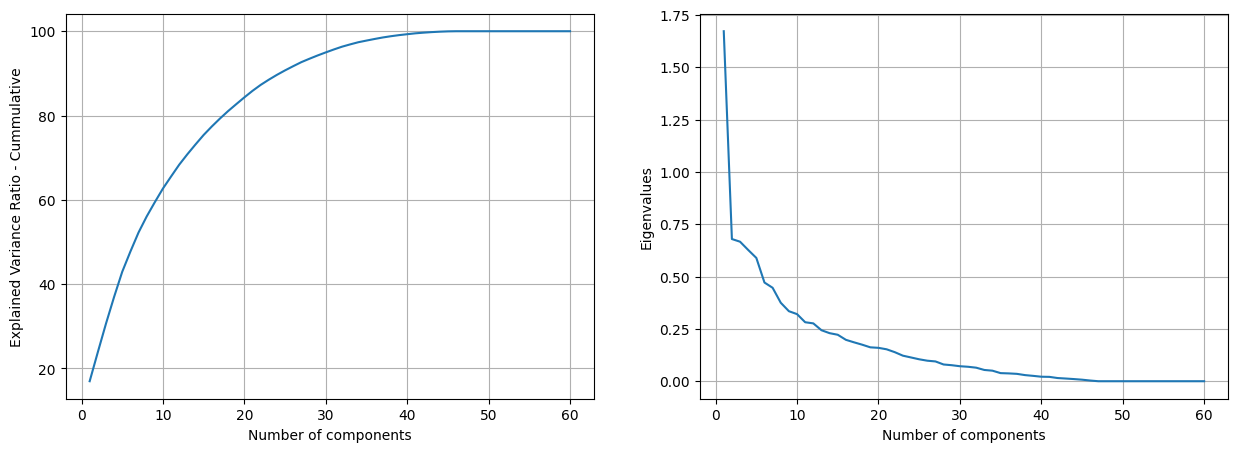

In [71]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 61), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 61), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [72]:
# Check the number of features if we want to retain 80 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.80) + 1
num_features

18

In [73]:
pca_final= PCA(n_components=18)
data_pca= pca_final.fit_transform(df_new)

In [74]:
data_fix = pd.DataFrame(data_pca, columns= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                            'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])
data_fix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-0.648947,-1.142391,0.209062,0.054203,-0.566087,-0.874043,0.236296,-0.231244,0.156943,-0.176807,0.033300,0.355280,0.833022,-0.495834,0.835350,0.304227,0.157159,-0.285289
1,0.581697,1.033723,-0.017777,0.628787,1.076927,0.636920,-0.883159,-1.097006,0.834118,-0.309249,-0.436050,-0.454121,0.405002,-0.858798,-0.243950,-0.106806,0.229686,-0.070633
2,-2.107655,0.726853,0.946057,0.267046,-0.601782,-0.284349,-1.361639,0.196135,-0.595293,0.013879,-0.357353,-1.015868,-0.328498,-0.205281,-0.269322,0.497876,-0.293527,-0.022880
3,-1.493642,-1.016557,-0.112236,0.165361,0.693720,-0.839057,-0.086614,-0.334211,0.247592,0.324950,0.107484,-0.871905,0.244093,-0.102635,-0.631208,0.134781,0.532441,0.029250
4,-1.308981,-0.373214,-0.863706,0.085235,1.291721,-0.402022,0.428410,-0.304373,0.555379,-0.178029,0.105716,-0.171312,-0.134092,0.202857,0.226614,-0.470927,-0.219049,-0.531185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.418431,-0.524943,0.524672,1.021896,0.069662,-0.722961,0.498272,-0.120996,0.911674,-0.287069,0.207265,-0.769248,-0.624342,0.801285,0.099239,0.346975,0.787110,-0.447603
296,0.703861,-0.384839,0.452465,0.133845,-0.916632,-0.668996,0.130701,-0.675064,0.953767,-0.105961,-0.136173,0.179830,-1.057946,0.124928,0.920767,0.515086,-0.610066,-0.307981
297,-1.962497,1.494141,-0.358648,-1.067583,0.131287,0.802012,0.753856,0.212819,0.163389,1.092865,0.938306,-0.785577,0.569725,0.684237,0.439283,0.258366,0.107269,-0.311686
298,-0.167050,-0.097911,-0.292242,0.115879,-0.805393,0.470320,0.477699,-1.040297,1.251211,0.196280,-0.261642,-0.212905,-0.203445,-0.402537,0.864778,-0.200156,0.212792,0.240339


This section we will use pca where we only want to reduce the data information by 80% and produce 18 columns of data

# Modeling

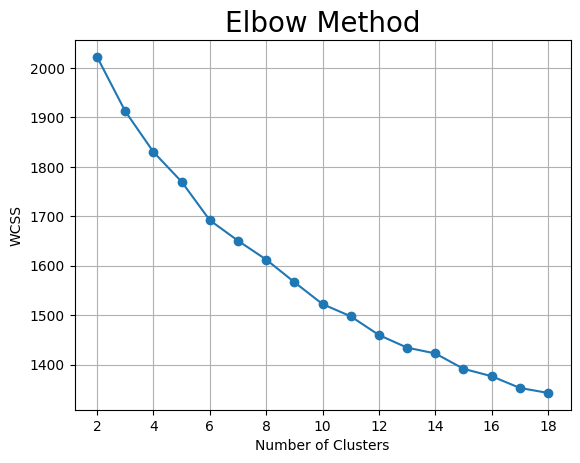

In [75]:
# Find the optimal number of clusters using Elbow Method
from sklearn.cluster import KMeans

wcss = []
random_state = 66
max_cluster = 18
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(data_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [76]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.14627586891937006
For n_clusters = 3 The average silhouette_score is : 0.09736894934919199
For n_clusters = 4 The average silhouette_score is : 0.08869373585463577
For n_clusters = 5 The average silhouette_score is : 0.06948361154545121
For n_clusters = 6 The average silhouette_score is : 0.07952622539299373
For n_clusters = 7 The average silhouette_score is : 0.0724398747449221
For n_clusters = 8 The average silhouette_score is : 0.06942519508168953
For n_clusters = 9 The average silhouette_score is : 0.07001386282545936
For n_clusters = 10 The average silhouette_score is : 0.07501185741026148
For n_clusters = 11 The average silhouette_score is : 0.0711560499083484
For n_clusters = 12 The average silhouette_score is : 0.0802280355182877
For n_clusters = 13 The average silhouette_score is : 0.07583086591187713
For n_clusters = 14 The average silhouette_score is : 0.07300658863154696
For n_clusters = 15 The average silhouette_score 

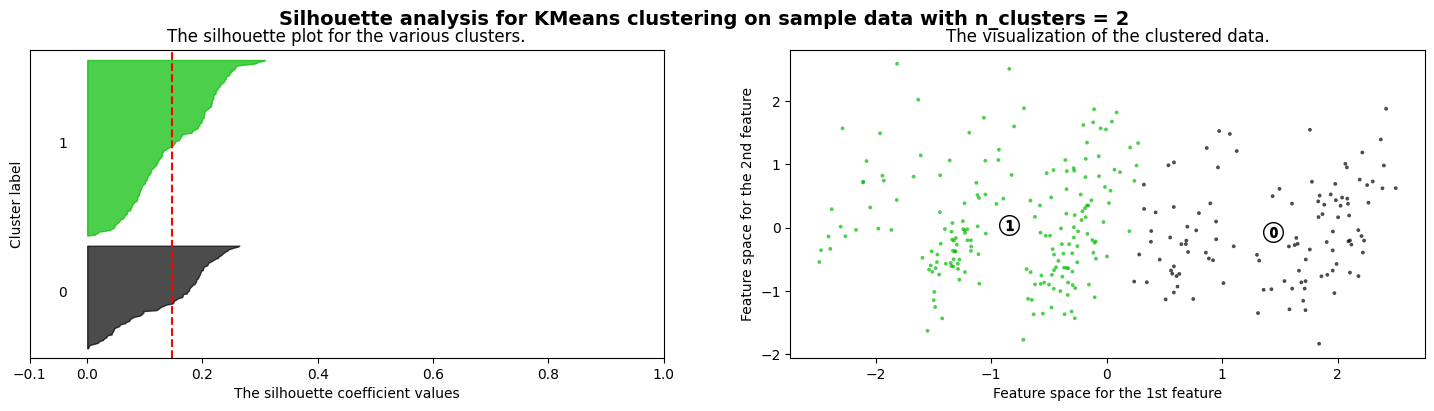

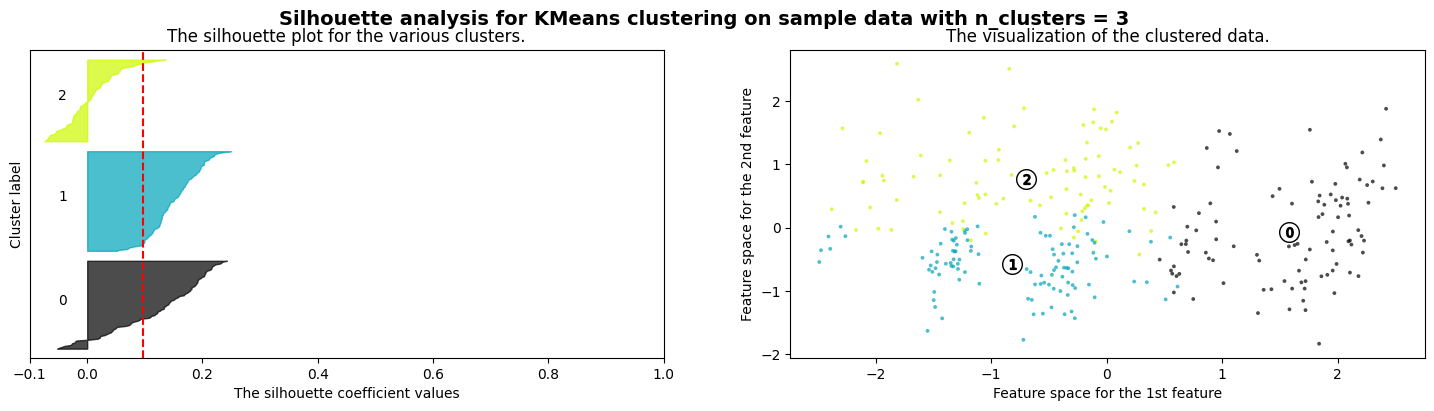

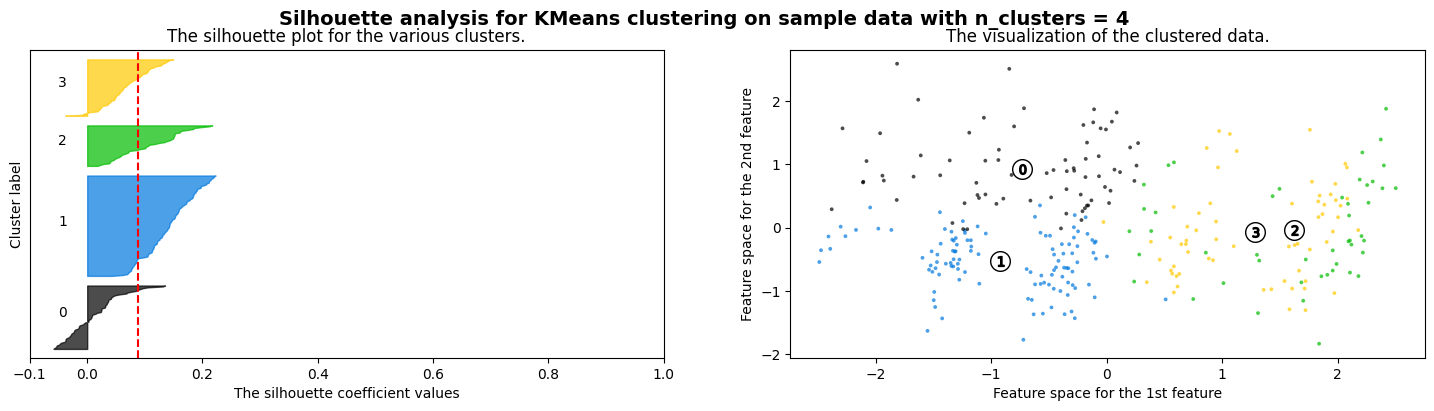

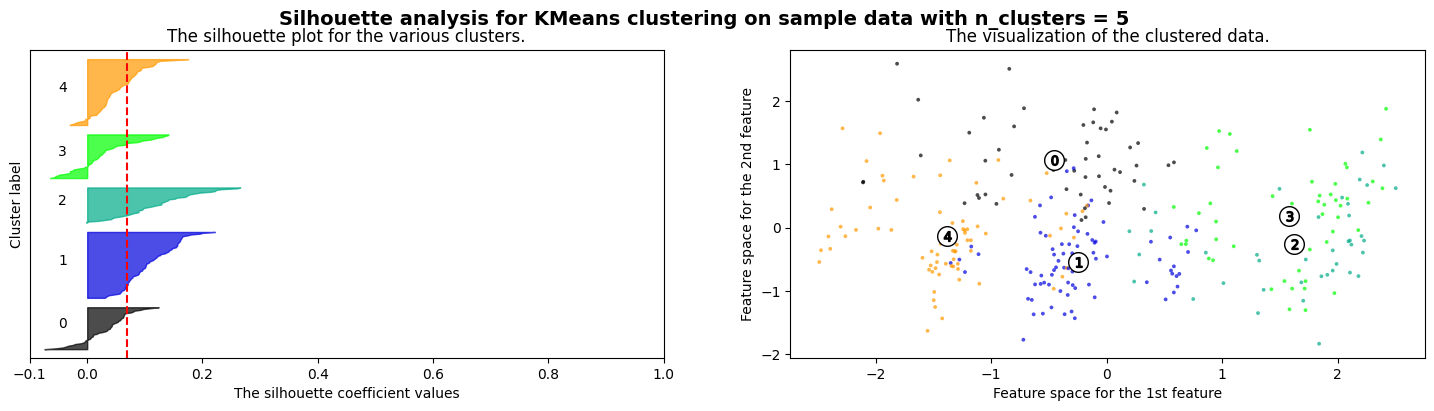

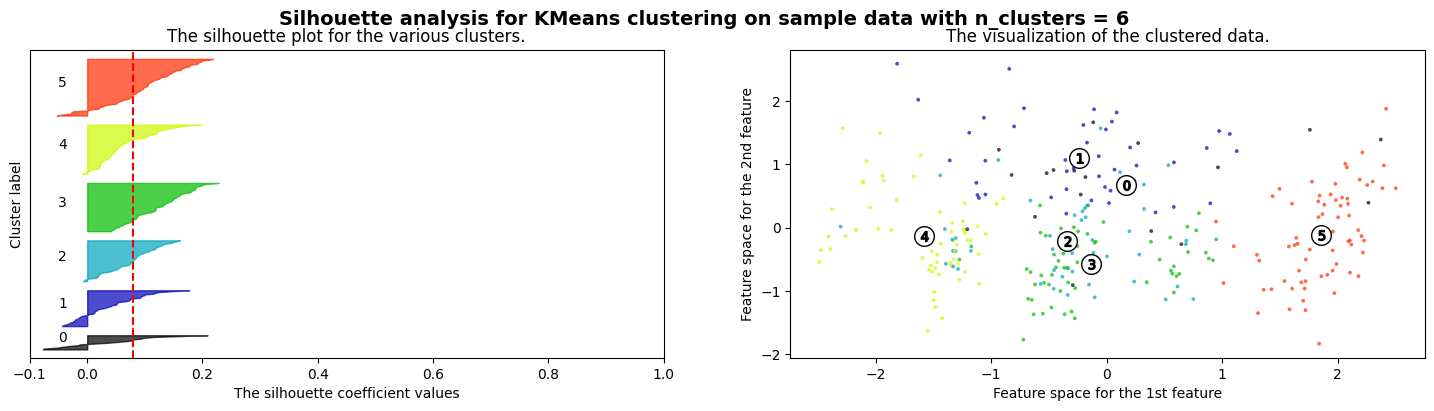

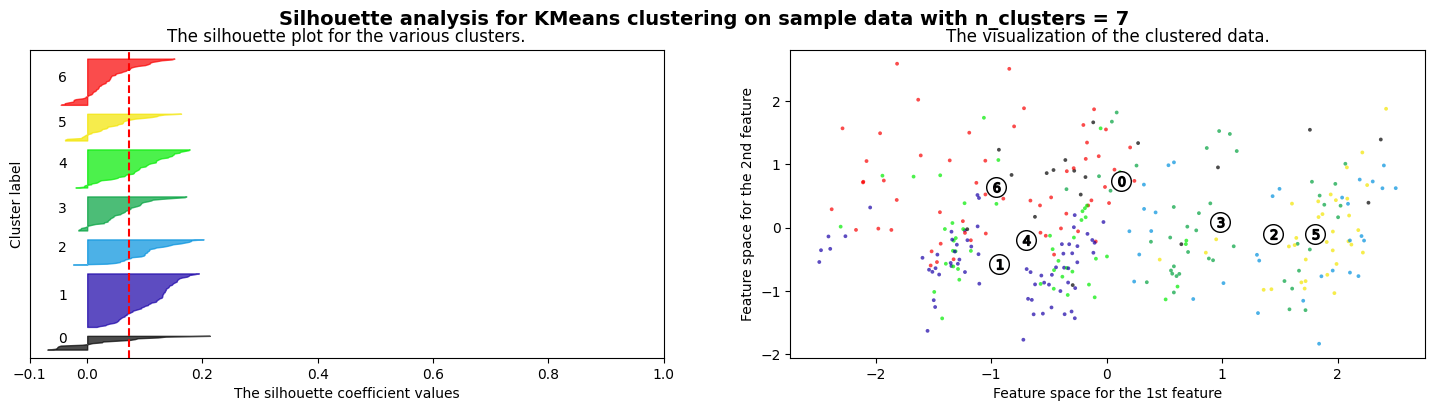

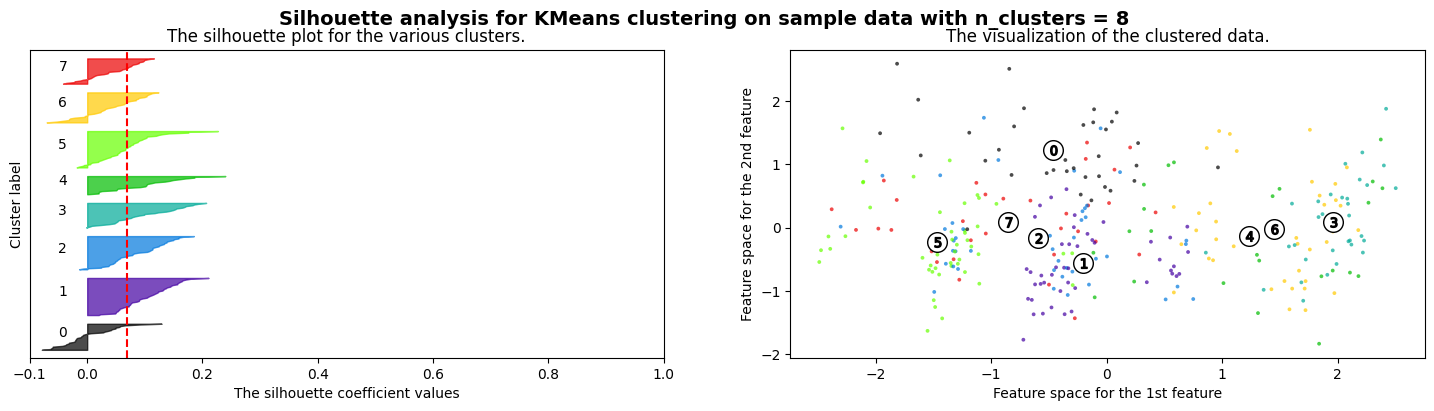

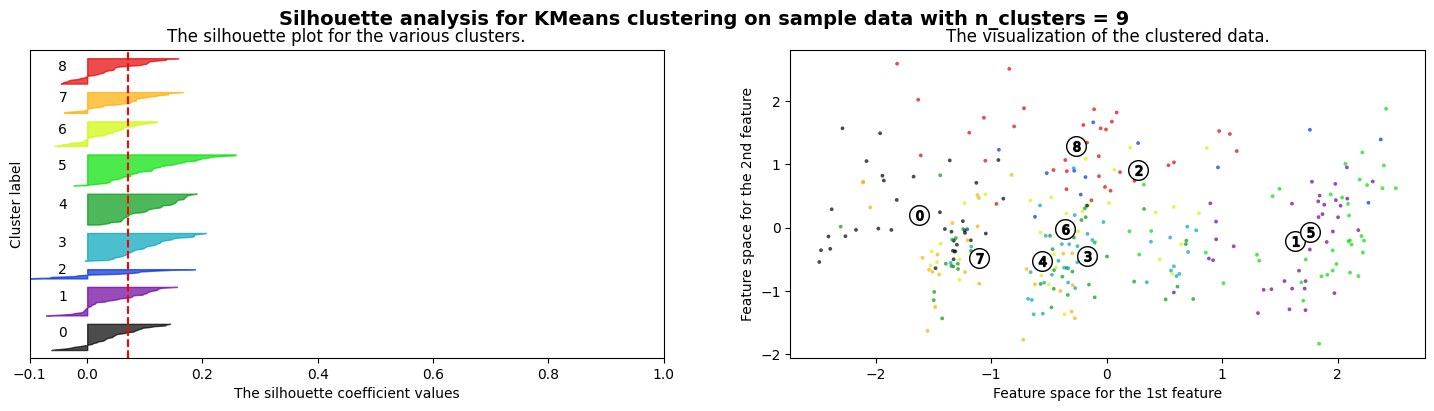

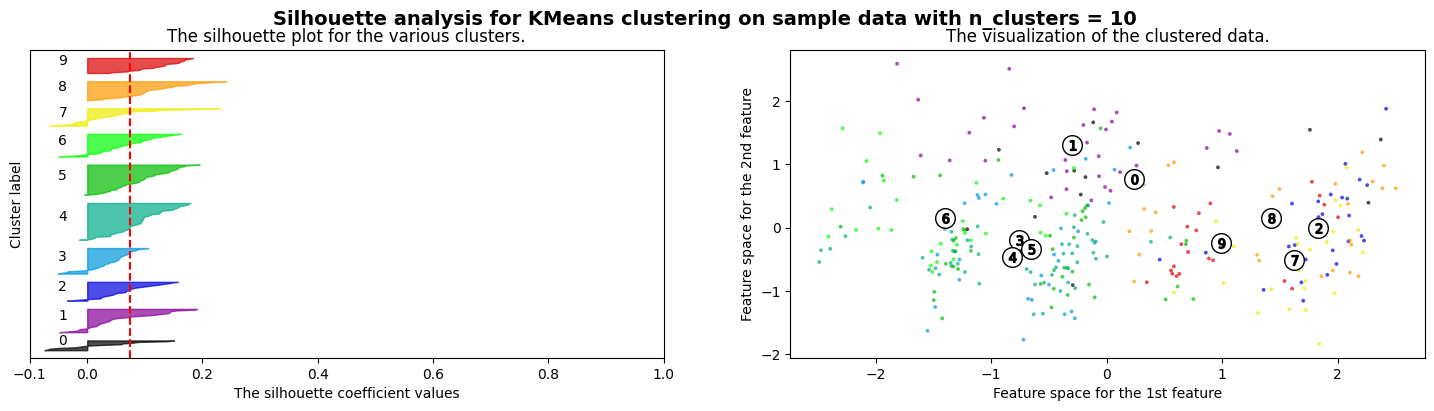

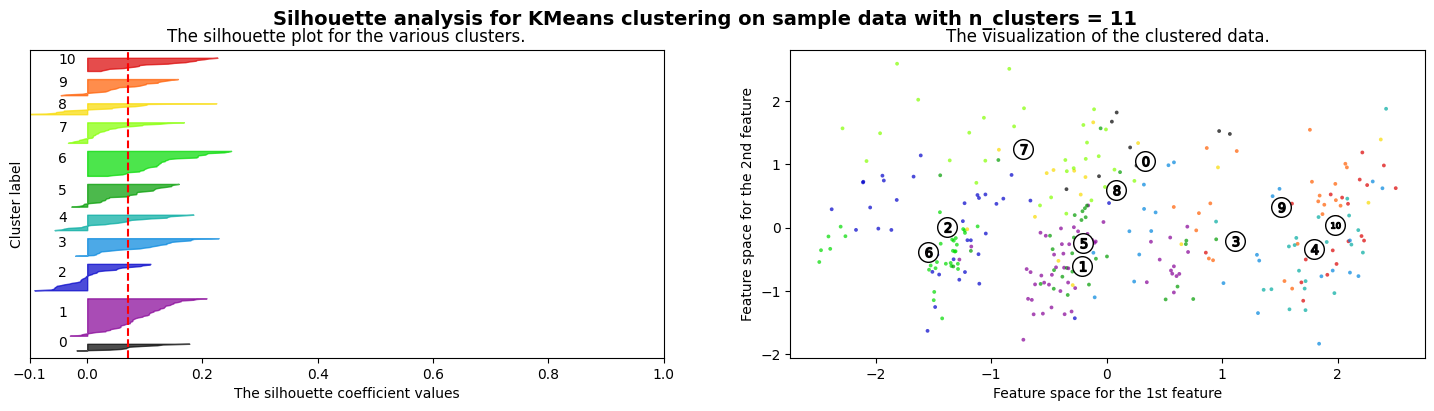

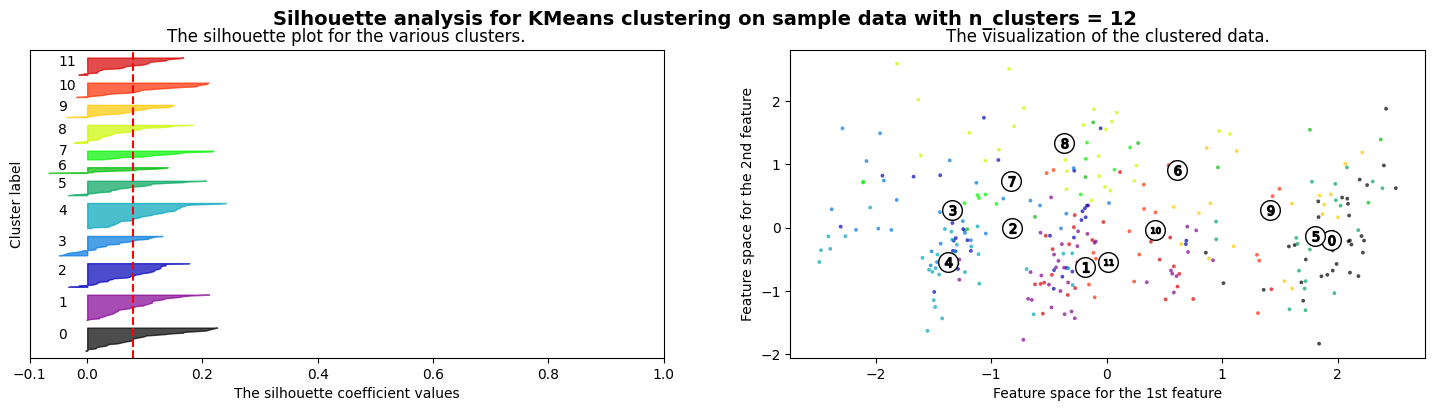

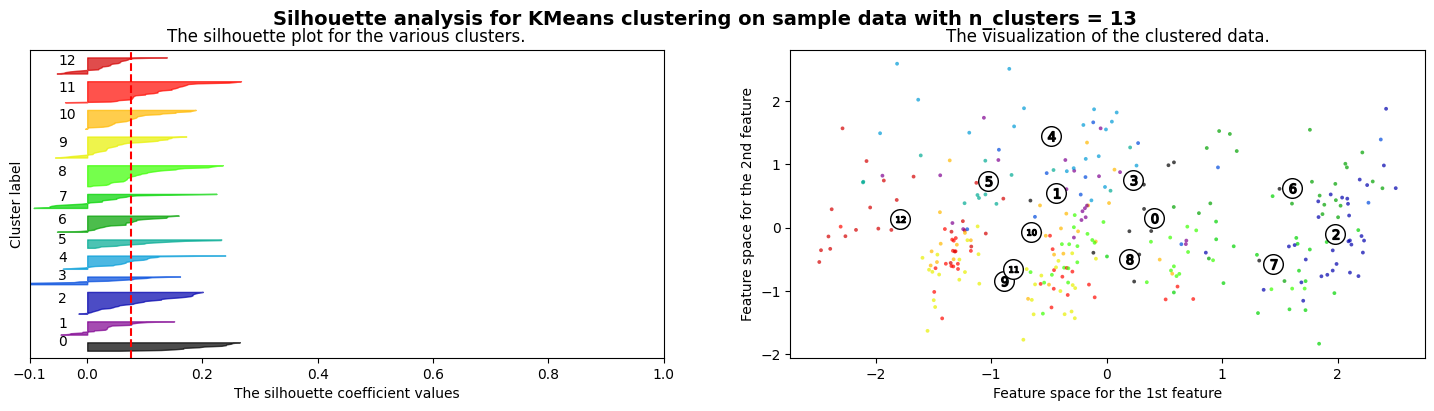

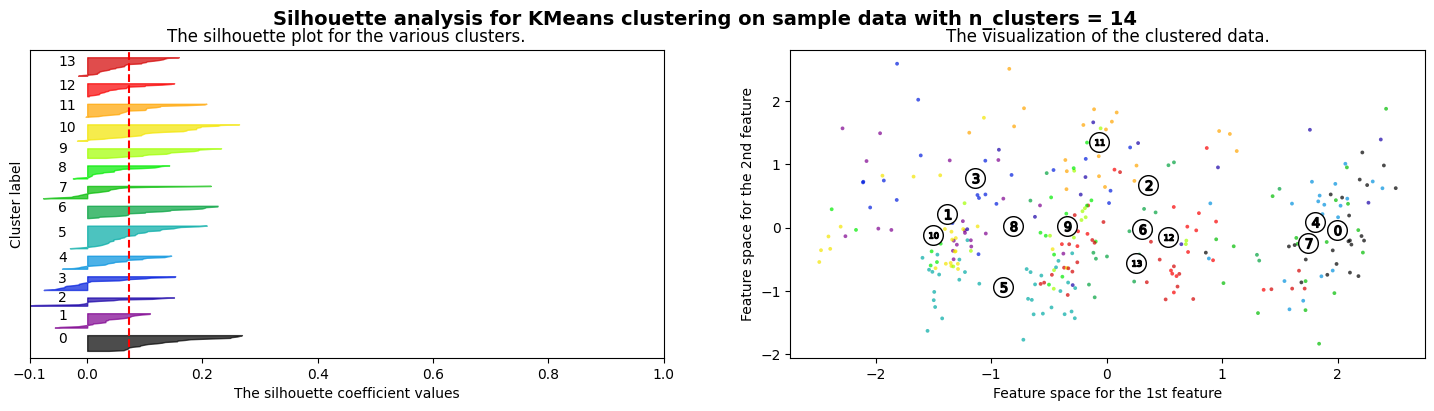

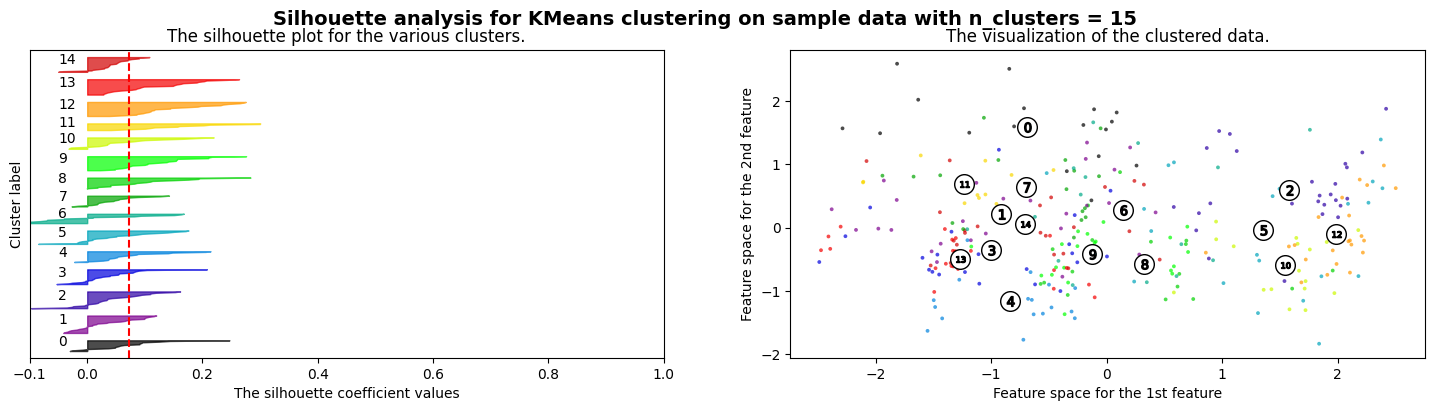

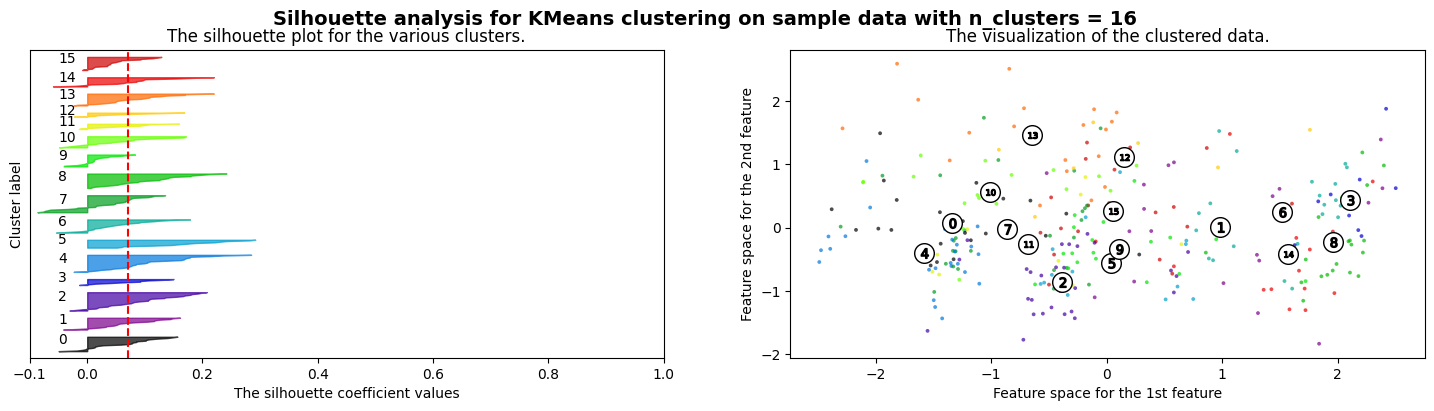

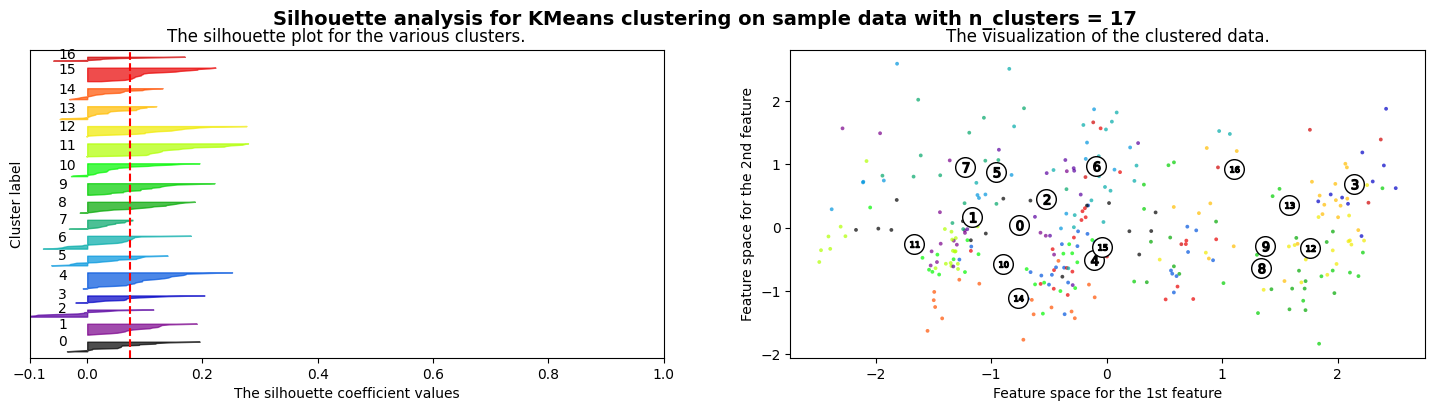

In [77]:
# Display the Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), data_pca, random_state)

In [78]:
model_kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)


In [79]:
model_kmeans.fit(data_pca)

KMeans(n_clusters=2, n_init=10, random_state=3)

In [80]:
model_kmeans.n_iter_

6

In [81]:
model_kmeans.inertia_

2022.3532302312333

The model we use uses k-means which uses 2 segmentations because the silhouette score has the highest value and looks quite balanced

# Predict Cluster

In [82]:
clusters= model_kmeans.predict(data_pca)
clusters

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [83]:
data_fix ['Clusters'] = clusters
data_fix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,Clusters
0,-0.648947,-1.142391,0.209062,0.054203,-0.566087,-0.874043,0.236296,-0.231244,0.156943,-0.176807,0.033300,0.355280,0.833022,-0.495834,0.835350,0.304227,0.157159,-0.285289,0
1,0.581697,1.033723,-0.017777,0.628787,1.076927,0.636920,-0.883159,-1.097006,0.834118,-0.309249,-0.436050,-0.454121,0.405002,-0.858798,-0.243950,-0.106806,0.229686,-0.070633,1
2,-2.107655,0.726853,0.946057,0.267046,-0.601782,-0.284349,-1.361639,0.196135,-0.595293,0.013879,-0.357353,-1.015868,-0.328498,-0.205281,-0.269322,0.497876,-0.293527,-0.022880,0
3,-1.493642,-1.016557,-0.112236,0.165361,0.693720,-0.839057,-0.086614,-0.334211,0.247592,0.324950,0.107484,-0.871905,0.244093,-0.102635,-0.631208,0.134781,0.532441,0.029250,0
4,-1.308981,-0.373214,-0.863706,0.085235,1.291721,-0.402022,0.428410,-0.304373,0.555379,-0.178029,0.105716,-0.171312,-0.134092,0.202857,0.226614,-0.470927,-0.219049,-0.531185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.418431,-0.524943,0.524672,1.021896,0.069662,-0.722961,0.498272,-0.120996,0.911674,-0.287069,0.207265,-0.769248,-0.624342,0.801285,0.099239,0.346975,0.787110,-0.447603,0
296,0.703861,-0.384839,0.452465,0.133845,-0.916632,-0.668996,0.130701,-0.675064,0.953767,-0.105961,-0.136173,0.179830,-1.057946,0.124928,0.920767,0.515086,-0.610066,-0.307981,1
297,-1.962497,1.494141,-0.358648,-1.067583,0.131287,0.802012,0.753856,0.212819,0.163389,1.092865,0.938306,-0.785577,0.569725,0.684237,0.439283,0.258366,0.107269,-0.311686,0
298,-0.167050,-0.097911,-0.292242,0.115879,-0.805393,0.470320,0.477699,-1.040297,1.251211,0.196280,-0.261642,-0.212905,-0.203445,-0.402537,0.864778,-0.200156,0.212792,0.240339,0


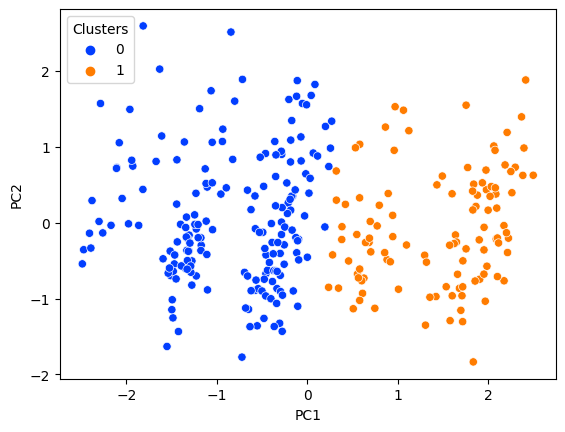

In [84]:
sns.scatterplot(x=data_fix['PC1'], y=data_fix['PC2'], hue=data_fix['Clusters'], palette='bright')
plt.show()

# Data Final 

In [85]:
df_fix.reset_index(drop = True, inplace=True)

In [86]:
data_final = pd.concat([df_fix,data_fix['Clusters']],axis=1)
data_final

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,Clusters
0,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,22,none,own,1,skilled,1,none,yes,0,0
1,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,53,none,for free,2,skilled,2,none,yes,0,1
2,0<=X<200,30,critical/other existing credit,new car,5234.0,<100,unemployed,4,male mar/wid,none,...,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,0,0
3,0<=X<200,12,existing paid,new car,1295.0,<100,<1,3,female div/dep/mar,none,...,25,none,rent,1,skilled,1,none,yes,0,0
4,<0,48,existing paid,business,4308.0,<100,<1,3,female div/dep/mar,none,...,24,none,rent,1,skilled,1,none,yes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0<=X<200,15,all paid,new car,1264.0,100<=X<500,1<=X<4,2,male mar/wid,none,...,25,none,rent,1,skilled,1,none,yes,0,0
296,0<=X<200,30,critical/other existing credit,furniture/equipment,8386.0,<100,4<=X<7,2,male single,none,...,49,none,own,1,skilled,1,none,yes,0,1
297,no checking,48,existing paid,business,4844.0,<100,unemployed,3,male single,none,...,33,bank,rent,1,high qualif/self emp/mgmt,1,yes,yes,0,0
298,<0,36,existing paid,used car,8229.0,<100,1<=X<4,2,male single,none,...,26,none,own,1,skilled,2,none,yes,0,0


In [87]:
col_cat

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker']

In [88]:
def grafik_count (feature):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data_final, x=feature, hue='Clusters')
    plt.xticks(rotation=90)
    plt.title(f'Countplot {feature} vs Clusters')
    plt.xlabel('Kategori')
    plt.ylabel('Jumlah')
    plt.show()


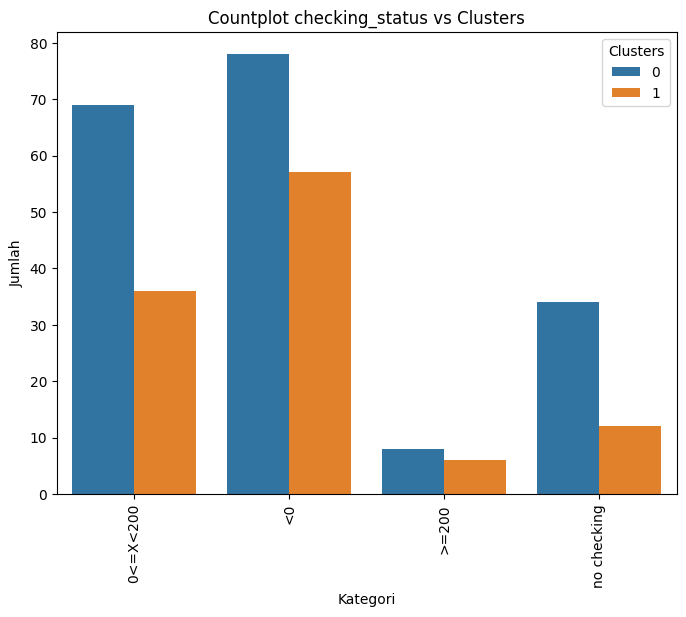

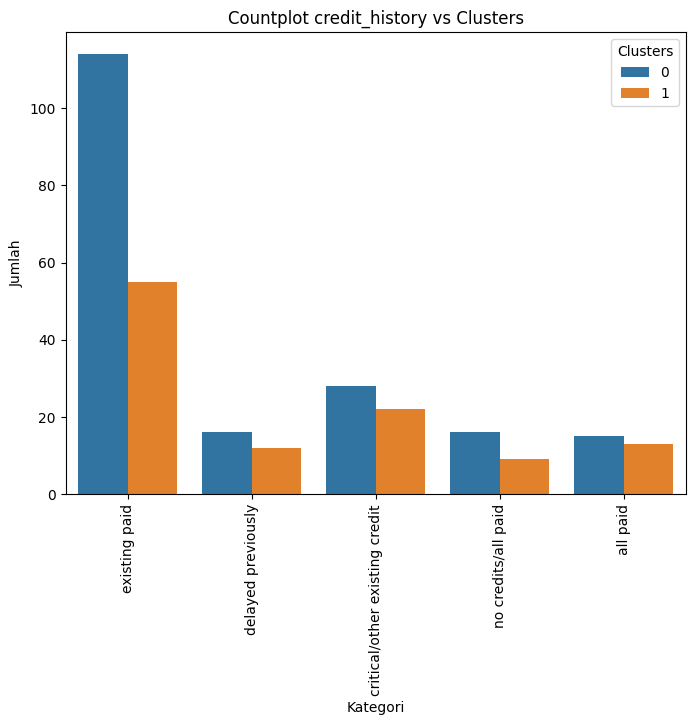

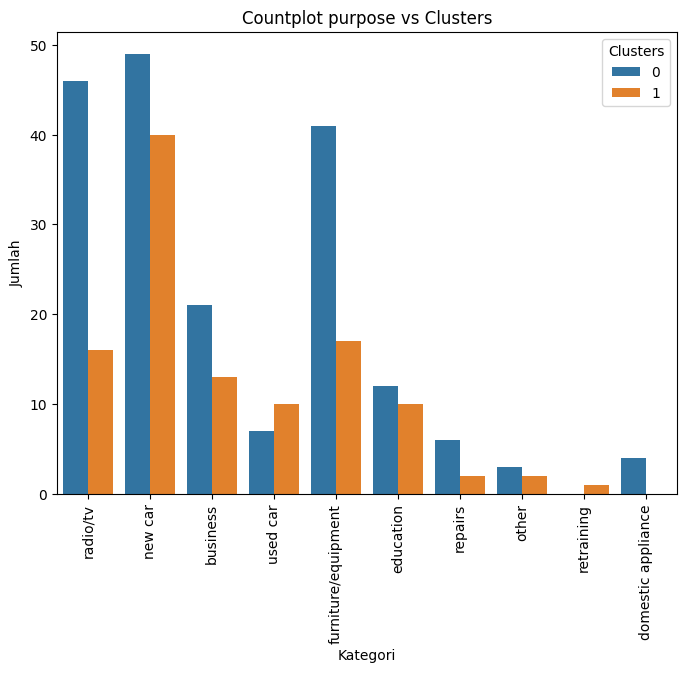

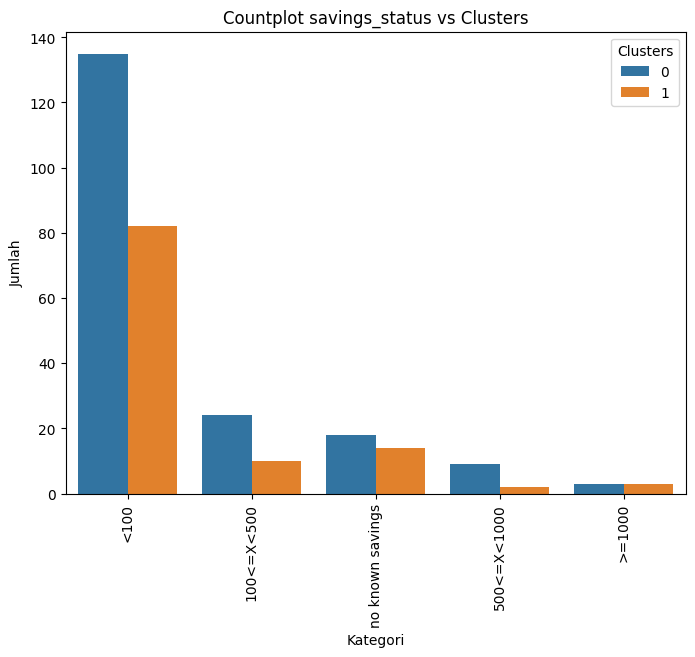

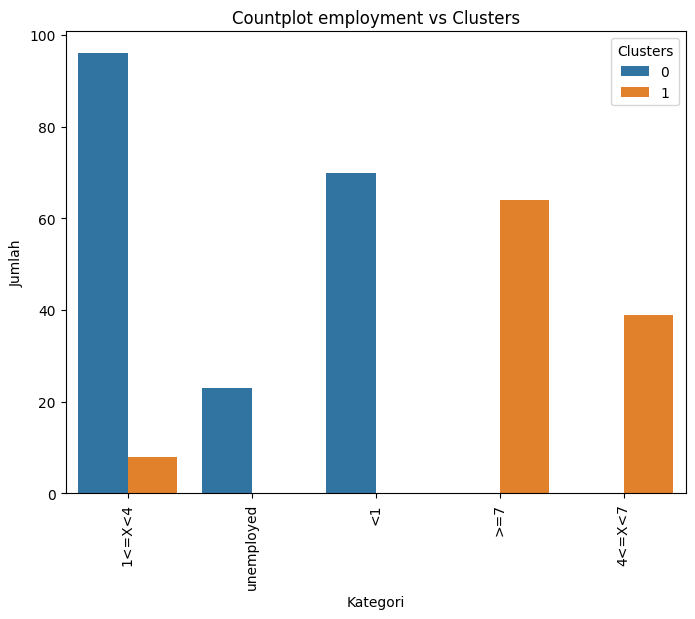

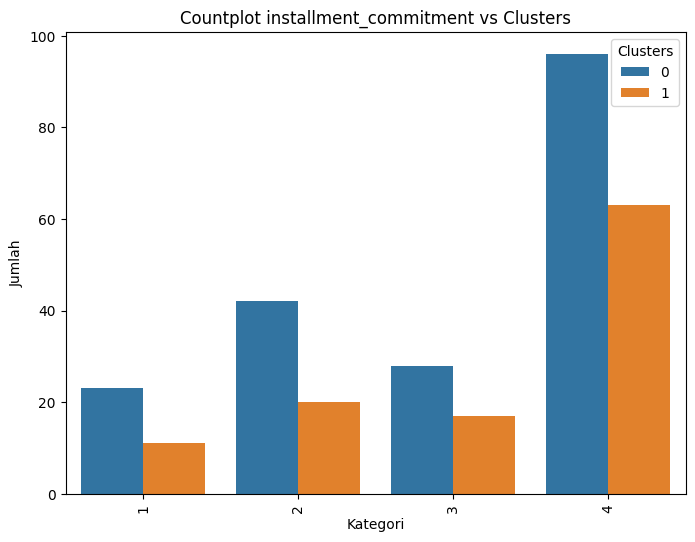

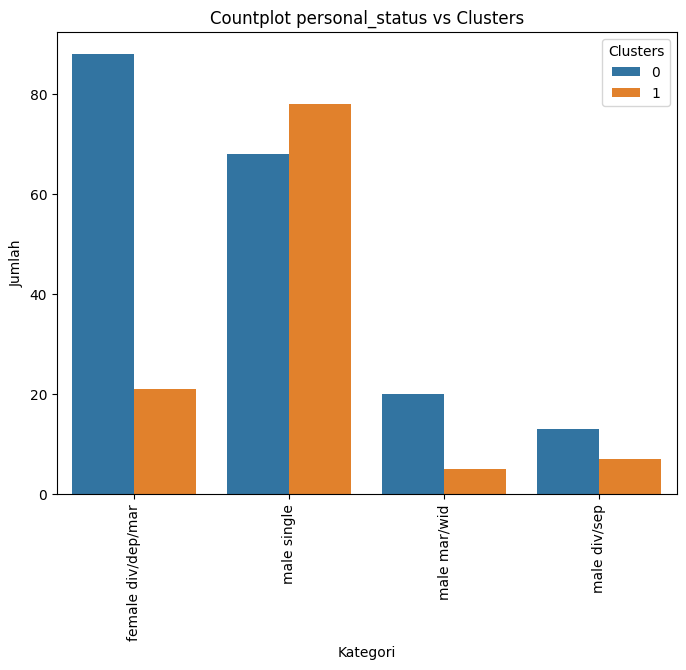

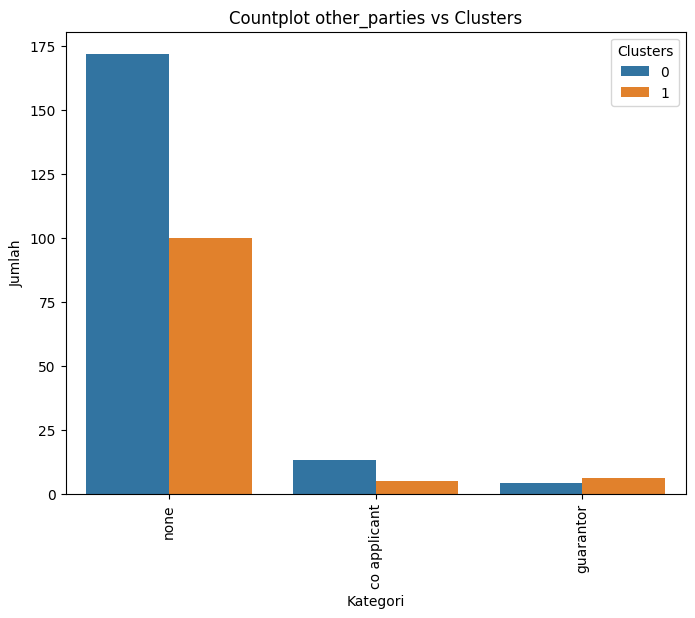

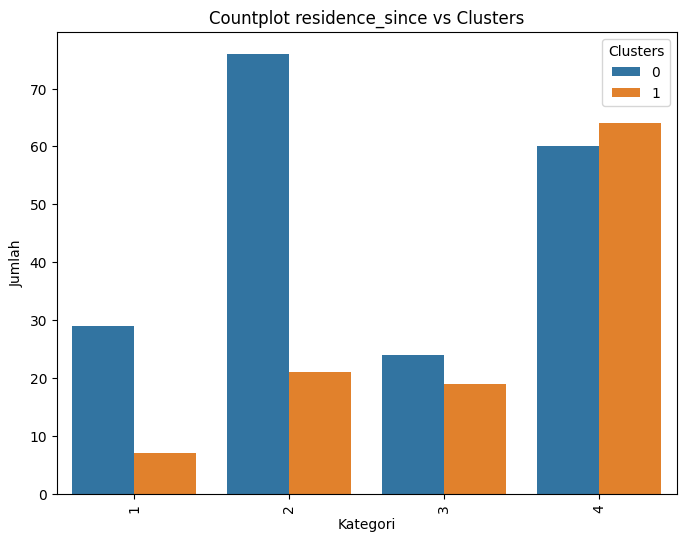

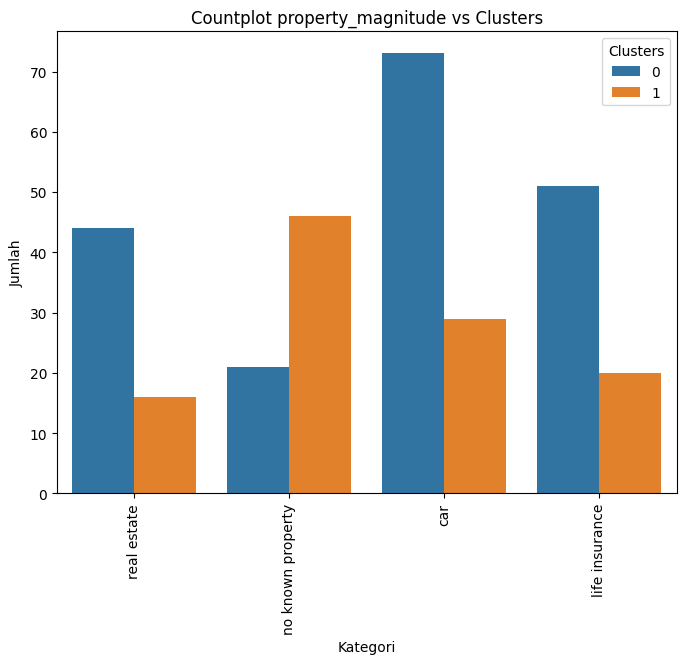

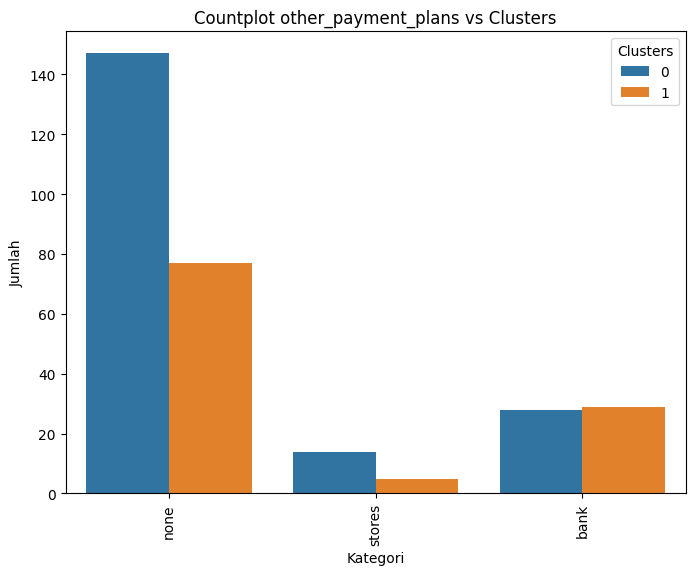

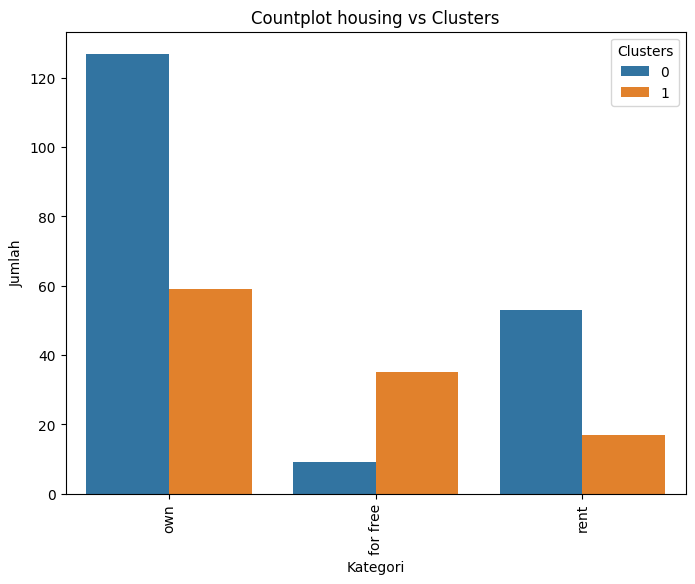

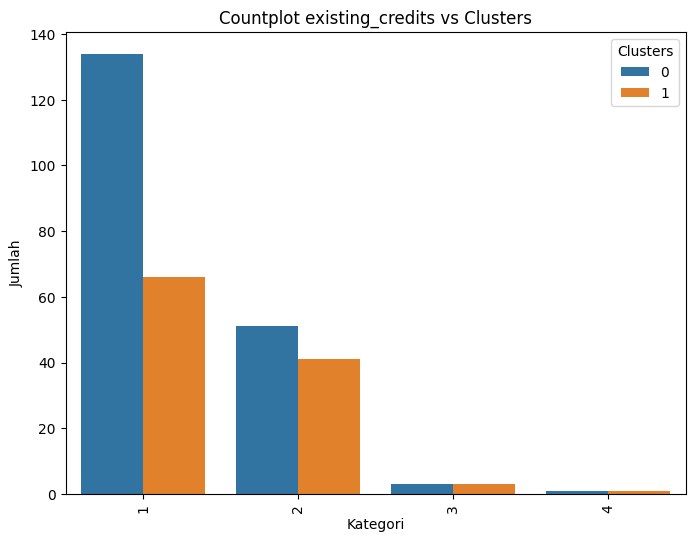

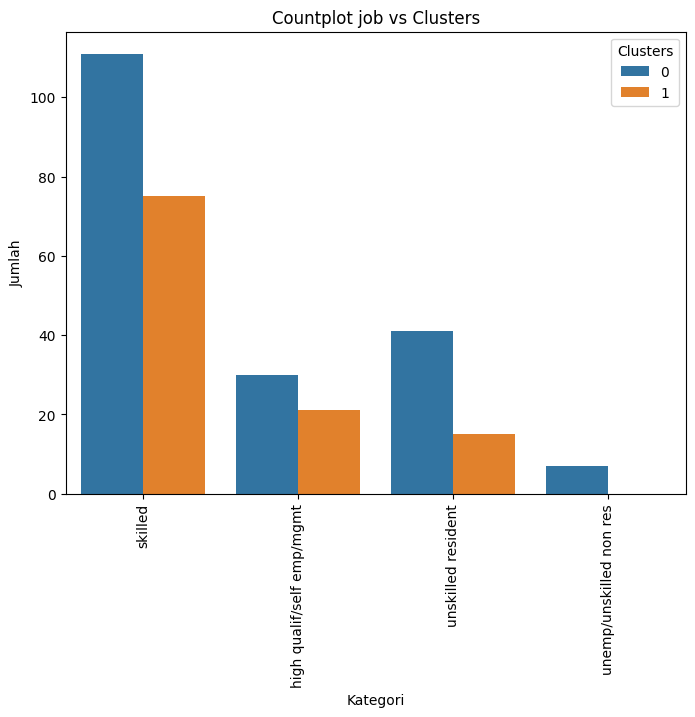

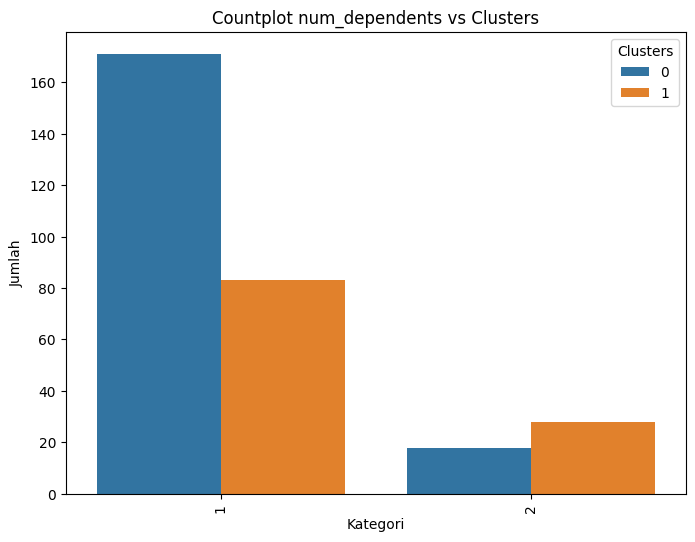

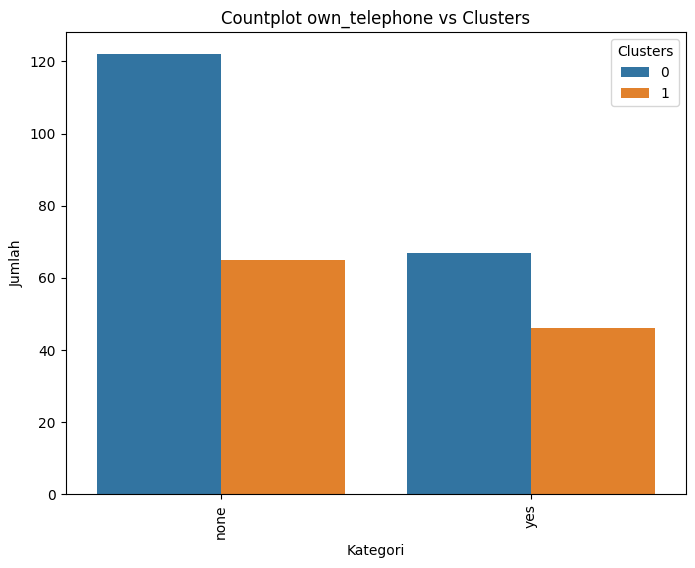

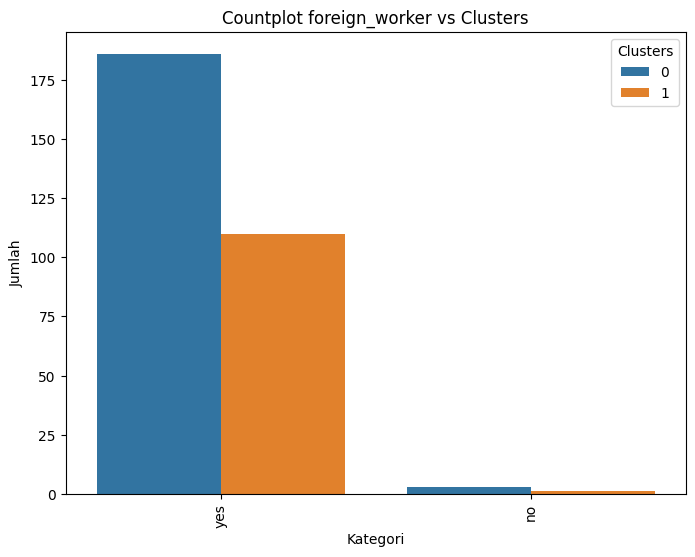

In [89]:
for i in col_cat:
    grafik_count(i)

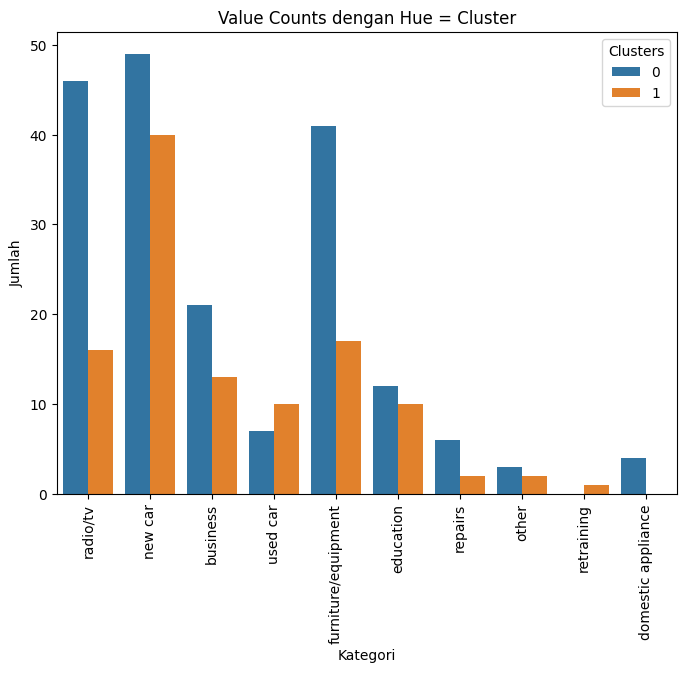

In [90]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_final, x='purpose', hue='Clusters')
plt.xticks(rotation=90)
plt.title('Value Counts dengan Hue = Cluster')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [91]:
col_num 

['age', 'duration', 'credit_amount']

In [92]:
df_heatmap = data_final[col_num]
df_heatmap

,age,duration,credit_amount
0,22,48,5951.0
1,53,24,4870.0
2,28,30,5234.0
3,25,12,1295.0
4,24,48,4308.0
...,...,...,...
295,25,15,1264.0
296,49,30,8386.0
297,33,48,4844.0
298,26,36,8229.0


In [93]:
df_heatmap = pd.concat([df_heatmap,data_final['Clusters']],axis=1)
df_heatmap

,age,duration,credit_amount,Clusters
0,22,48,5951.0,0
1,53,24,4870.0,1
2,28,30,5234.0,0
3,25,12,1295.0,0
4,24,48,4308.0,0
...,...,...,...,...
295,25,15,1264.0,0
296,49,30,8386.0,1
297,33,48,4844.0,0
298,26,36,8229.0,0


In [94]:
cluster = df_heatmap.groupby('Clusters').mean()

In [95]:
scaler = MinMaxScaler()
data = scaler.fit_transform(cluster)
scaled_means = pd.DataFrame(data,cluster.index,cluster.columns)

<Axes: ylabel='Clusters'>

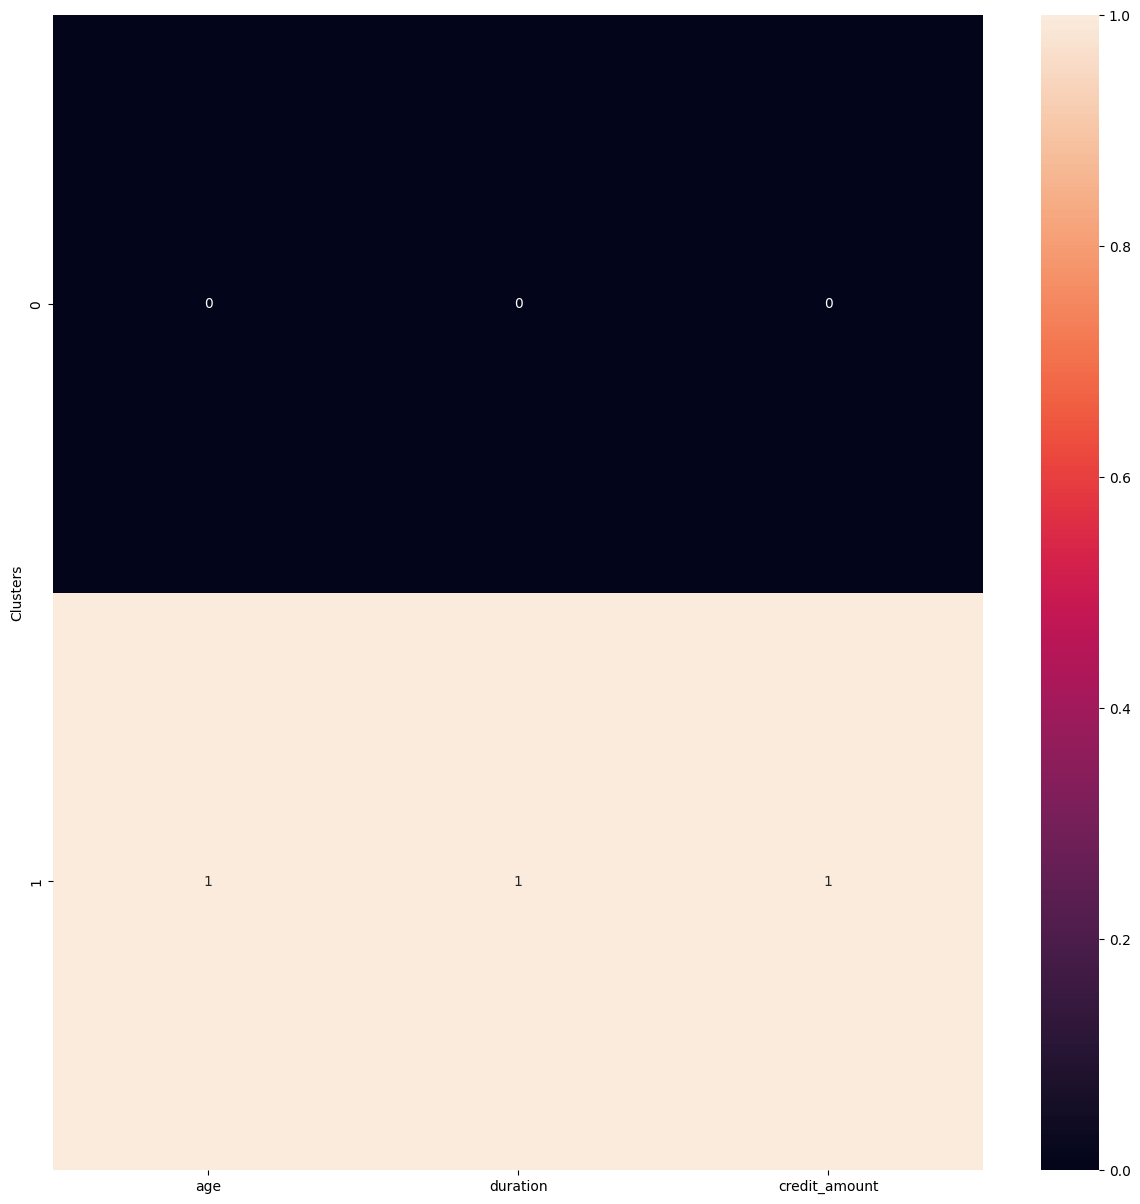

In [96]:
plt.figure(figsize = (15,15))
sns.heatmap(scaled_means,annot=True)


In [97]:
data_final

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,Clusters
0,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,22,none,own,1,skilled,1,none,yes,0,0
1,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,53,none,for free,2,skilled,2,none,yes,0,1
2,0<=X<200,30,critical/other existing credit,new car,5234.0,<100,unemployed,4,male mar/wid,none,...,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,0,0
3,0<=X<200,12,existing paid,new car,1295.0,<100,<1,3,female div/dep/mar,none,...,25,none,rent,1,skilled,1,none,yes,0,0
4,<0,48,existing paid,business,4308.0,<100,<1,3,female div/dep/mar,none,...,24,none,rent,1,skilled,1,none,yes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0<=X<200,15,all paid,new car,1264.0,100<=X<500,1<=X<4,2,male mar/wid,none,...,25,none,rent,1,skilled,1,none,yes,0,0
296,0<=X<200,30,critical/other existing credit,furniture/equipment,8386.0,<100,4<=X<7,2,male single,none,...,49,none,own,1,skilled,1,none,yes,0,1
297,no checking,48,existing paid,business,4844.0,<100,unemployed,3,male single,none,...,33,bank,rent,1,high qualif/self emp/mgmt,1,yes,yes,0,0
298,<0,36,existing paid,used car,8229.0,<100,1<=X<4,2,male single,none,...,26,none,own,1,skilled,2,none,yes,0,0


In [98]:
def analisa_eda2(feature):
    sns.scatterplot(x=feature, y='Clusters', data=data_final,hue='Clusters',palette="Set1")
    plt.title(f'Scatter Plot of {feature} vs Clusters')
    plt.show()

    sns.histplot(data=data_final, x=feature, kde=True, hue='Clusters',palette="Set1")
    plt.title(f'Histogram Plot of {feature} vs Clusters')
    plt.show()
    
   




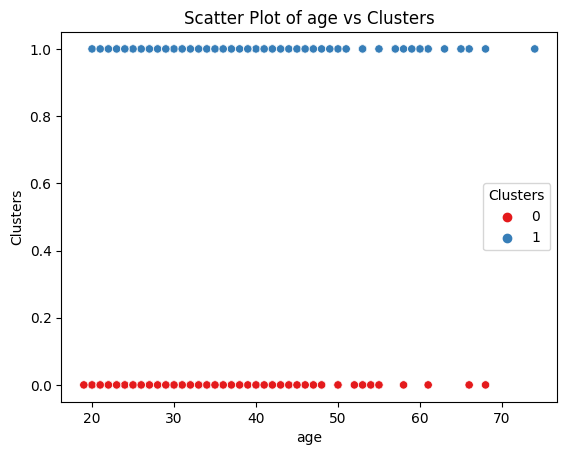

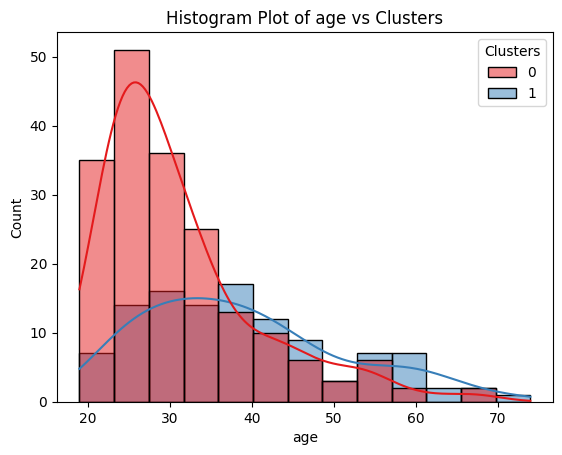

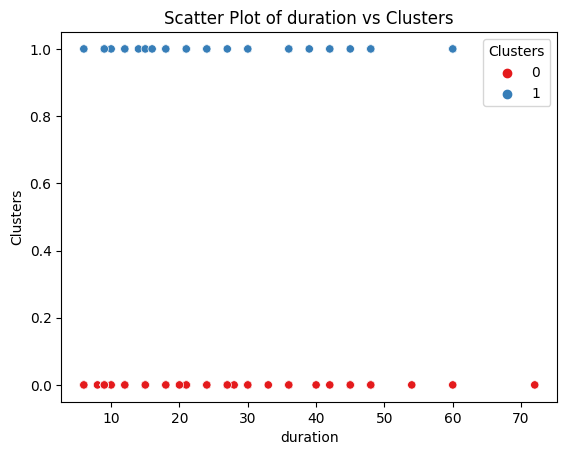

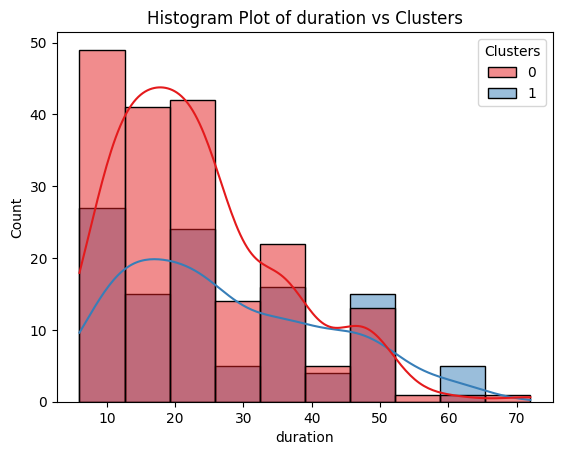

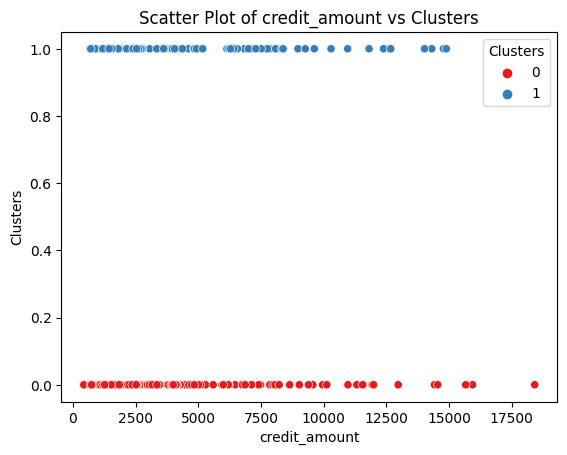

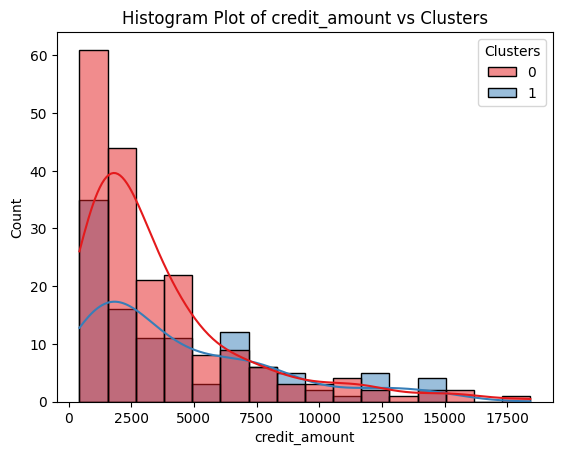

In [99]:
for i in col_num :
    analisa_eda2(i)

# Conclusion

- Cluster 0: Comprises young customers who tend to use their credit cards for purchasing luxury or expensive items. The majority of them already own a house and typically choose shorter tenures for their credit card installment payments.

- Cluster 1: Encompasses older customers living with their children. These customers tend to have high credit balances on their cards and opt for longer tenures when paying off their credit card installments.

Insight for Business:
- Implement a threshold regarding the minimum balance and age for credit card users. Credit limits can be determined based on assets and appropriate employment to avoid incorrect credit allocations. For those who are unable to make payments, we can suggest extending the loan tenure and offering a reduced interest rate.



# Saving

In [100]:
# Membuat Pipeline semua proses
all_process = Pipeline([
    ("preprocess", prep),
    ("pca", pca_final),
    ("mddel", model_kmeans)
])

all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Capping',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['age',
                                                                                         'duration',
                                                                                         'credit_amount'])),
                                                                  ('Scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'duration',
                                                   'credit_amount']),
                                                 ('cat_ordinal',
                                                  Pipeline(steps=[('Encoder',
                                                                   OrdinalEncoder(categories=[['no '
                                                                                               'checking',
                                                                                               '<0',...
                                                                   OneHotEncoder(sparse=False,
                                                                                 sparse_output=False))]),
                                                  ['credit_history', 'purpose',
                                                   'installment_commitment',
                                                   'personal_status',
                                                   'other_parties',
                                                   'residence_since',
                                                   'property_magnitude',
                                                   'other_payment_plans',
                                                   'housing',
                                                   'existing_credits', 'job',
                                                   'num_dependents',
                                                   'own_telephone',
                                                   'foreign_worker'])])),
                ('pca', PCA(n_components=18)),
                ('mddel', KMeans(n_clusters=2, n_init=10, random_state=3))])

In [101]:
# Model Saving

with open('all_process.pkl', 'wb') as file_1:
  pickle.dump(all_process, file_1)